# JHUPIEGO - RISE DATA DISCOVERY

# Import Libraries

In [4]:
import pandas as pd
import datetime as dt
import warnings
import os
# get parent user path
user_dev_path = os.path.dirname(os.getcwd())
# get parent path for package
package_path = os.path.dirname(user_dev_path)
import seaborn as sns
import yaml
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

**Working Functions**

In [2]:
def check_null_values(df):
    if df is not None:
        try:
            missing_value = df.isnull().sum()
            mis_val_percent = 100 * df.isnull().sum() / len(df)
            mis_val_table = pd.concat([missing_value, mis_val_percent], axis=1)
            mis_val_table_rename_cols = mis_val_table.rename(
                columns={0: "Missing Values", 1: "% of Total Values"}
            )
            mis_val_table_rename_cols = (
                mis_val_table_rename_cols[mis_val_table_rename_cols.iloc[:, 1] != 0]
                .sort_values("% of Total Values", ascending=False)
                .round(1)
            )
            print(
                "There are "
                + str(mis_val_table_rename_cols.shape[0])
                + " columns that have missing values"
            )
            return mis_val_table_rename_cols
        except Exception as e:
            print(f"Exception on checking missing values with error: {e}")
            
def load_excel_sheet(path: str):
    if path is not None:
        try:
            xls = pd.ExcelFile(path)
            df = xls.parse(skiprows=0)
            return df
        except Exception as e:
            print(f"Exception on loading excel spreadsheet with error: {e}")
            
def date_visit_conversion(df,visit_col: str,visit_year: str, visit_month: str):
    if df is not None:
        try:
            df = df.copy()
            df[visit_col] = pd.to_datetime(df[visit_col],errors='coerce')
            df[visit_year] = df[visit_col].dt.year
            df[visit_month] = df[visit_col].dt.month
            return df
        except Exception as e:
            print(f"Exception on converting visit date with error: {e}") 
            
def plot_visit_date(df, primary_key: str, data_name: str):
    if df is not None:
        df_sub = df.query("VISIT_YEAR > 1990 and VISIT_YEAR < 2022")
        df_sub_slice = df_sub.groupby("VISIT_YEAR").agg(
            {primary_key: lambda x: x.nunique()}
        )
        df_sub_slice.reset_index(inplace=True)
        df_sub_slice["VISIT_YEAR"] = df_sub_slice["VISIT_YEAR"].astype("int")
        ax_sub = sns.barplot(x="VISIT_YEAR", y=primary_key, data=df_sub_slice)
        ax_sub.set(xlabel="Year of Visit", ylabel="Number of Patient Visits")
        ax_sub.set_title(f"'Trend of Yearly Patient Visits:{data_name}'")
        plt.xticks(rotation=60)
        
def convert_to_datetime(df,date_col: str):
    if df is not None:
        try:
            df[date_col] = pd.to_datetime(df[date_col],errors='coerce')
            return df
        except Exception as e:
            print(f"Exception on converting to datetime with error: {e}")      

def print_min_max_dates(df,date_col: str,type_date: str):
    if df is not None:
        return print(f" The earliest {type_date} date is: {df[date_col].min()}, and the most recent {type_date} date is {df[date_col].max()}") 
    
def print_num_rows_cols(df, df_name: str):
        if df is not None:
            return print(f"{df_name} data has {df.shape[1]} columns and {df.shape[0]} rows.")
        
# get indexing correct only showing last category
def categorical_bar_plots(df,unique_id):
    if df is not None:
        for i in df.columns[df.dtypes==object]:
            df_plot = df.groupby(i).agg({unique_id:lambda x: x.nunique()})
            df_plot.reset_index(inplace=True)
            ax = sns.barplot(x = i,y=unique_id,data=df_plot)
            ax.set_title(i)
            
def categorical_bar_plot(df):
    if df is not None:
        for i in df.columns[df.dtypes==object]:
            df[i].value_counts().plot(kind='bar')
            plt.title(i)
            plt.show()

## Loading Data

In [5]:
 try: 
    with open (user_dev_path + '/' + 'config_LTFU.yaml', 'r') as file:
        config = yaml.safe_load(file)
except Exception as e:
    print(f'Error reading the config file, {e}')

In [6]:
input_root = config['rise_files']['raw_data_path']
patient_file = config['rise_files']['raw_patient_file']
patient_input = input_root + patient_file
print(patient_input)

/data/rise_data/PatientDemographicsData.xlsx


In [3]:
# Patient demo
df_dem_data = load_excel_sheet(patient_input)

## Initial Summary

### Patient Demographics

In [31]:
print_num_rows_cols(df_dem_data,'Patient Demographics')

Patient Demographics data has 57 columns and 152552 rows.


In [32]:
df_dem_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152552 entries, 0 to 152551
Data columns (total 57 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   State                  152552 non-null  object        
 1   L.G.A                  152552 non-null  object        
 2   Facility Name          152552 non-null  object        
 3   PATIENT_ID             152552 non-null  int64         
 4   FACILITY_ID            152552 non-null  int64         
 5   HOSPITAL_NUM           152552 non-null  object        
 6   UNIQUE_ID              94444 non-null   object        
 7   GENDER                 152552 non-null  object        
 8   DATE_BIRTH             152552 non-null  object        
 9   AGE                    152552 non-null  int64         
 10  age_unit               152552 non-null  object        
 11  marital_status         147870 non-null  object        
 12  education              143545 non-null  obje

In [18]:
check_null_values(df_dem_data)

There are 41 columns that have missing values


Missing Values  % of Total Values
PARTNERINFORMATION_ID          152552              100.0
AGREED_DATE                    152534              100.0
SOURCE_REFERRAL                152177               99.8
TIME_HIV_DIAGNOSIS             152100               99.7
DATE_ENROLLED_PMTCT            151488               99.3
CAUSE_DEATH                    150543               98.7
DATE_TRACKED                   150090               98.4
RECENCY_CONSENT                144524               94.7
OUTCOME                        133094               87.2
LAST_REFILL_SETTING            127526               83.6
DATE_LAST_CD4                  110846               72.7
WARD                            94466               61.9
DATE_LAST_VIRAL_LOAD            75477               49.5
UNIQUE_ID                       58108               38.1
DATE_CONFIRMED_HIV              51946               34.1
tb_status                       51879               34.0
entry_point                     47050               30.8
VIRAL_LOAD_DUE_DATE             42522               27.9
VIRAL_LOAD_TYPE                 42522               27.9
ENROLLMENT_SETTING              35250               23.1
LAST_CLINIC_STAGE               23531               15.4
DATE_STARTED                    23198               15.2
REGIMENTYPE                     22804               14.9
REGIMEN                         22799               14.9
DATE_NEXT_REFILL                22797               14.9
DATE_LAST_REFILL                22797               14.9
DATE_NEXT_CLINIC                21263               13.9
DATE_LAST_CLINIC                17811               11.7
RECENCY_TESTING                 14771                9.7
CBO_ID                          14321                9.4
BIOMETRIC                       11229                7.4
enrolled_ovc                    11229                7.4
education                        9007                5.9
OCCUPATION                       6239                4.1
marital_status                   4682                3.1
STATE                            2937                1.9
lga                              2543                1.7
STATUS_REGISTRATION               940                0.6
DATE_REGISTRATION                 141                0.1
DATE_CURRENT_STATUS               135                0.1
CURRENT_STATUS                     12                0.0

In [9]:
df_dem_data.duplicated(subset=['FACILITY_ID','DATE_BIRTH']).sum()

58269

In [43]:
df_dem_data['age_unit'].value_counts()

year(s)     150693
month(s)      1808
day(s)          51
Name: age_unit, dtype: int64

In [44]:
df_dem_data.groupby('age_unit')['AGE'].mean()

age_unit
day(s)      15.411765
month(s)     7.523783
year(s)     33.793560
Name: AGE, dtype: float64

In [45]:
df_dem_data.groupby('age_unit')['AGE'].max()

age_unit
day(s)        92
month(s)      60
year(s)     1001
Name: AGE, dtype: int64

In [50]:
df_dem_data['REGIMENTYPE'].value_counts()

ART First Line Adult        124251
ART First Line Children       4694
ART Second Line Adult          759
ART Second Line Children        41
Third Line                       3
Name: REGIMENTYPE, dtype: int64

In [39]:
df_dem_data.groupby(['REGIMENTYPE','REGIMEN'])['REGIMEN'].count()

REGIMENTYPE               REGIMEN                                            
ART First Line Adult      ABC(300mg)+3TC(150mg)+EFV(600mg)                          36
                          ABC(300mg)+3TC(150mg)+NVP(200mg)                          39
                          ABC(600mg)+3TC(300mg)+DTG(50mg)                           70
                          ABC(60mg)+3TC(30mg)+EFV(200mg)                             1
                          AZT(300mg)+3TC(150mg)+ABC(300mg)                        1202
                          AZT(300mg)+3TC(150mg)+EFV(600mg)                         788
                          AZT(300mg)+3TC(150mg)+NVP(200mg)                        6888
                          AZT(300mg)+3TC(150mg)+TDF(300mg)                          76
                          AZT/3TC(300/150mg)+EFV(200mg)                             60
                          AZT/3TC(300/150mg)+EFV(600mg)                             27
                          AZT/3TC(300/150mg)+LPV/r(2

In [52]:
df_dem_data['CBO_ID'].value_counts()

0.0    138071
4.0        40
3.0        34
6.0        34
5.0        30
1.0        18
2.0         4
Name: CBO_ID, dtype: int64

In [34]:
df_dem_data['LAST_CLINIC_STAGE'].value_counts()

Stage I      91040
Stage II     24113
Stage III    12523
Stage IV      1340
Stage II?        4
Stage IIt        1
Name: LAST_CLINIC_STAGE, dtype: int64

In [36]:
df_dem_data['tb_status'].value_counts()

No sign or symptoms of TB                                                                                                            91713
Currently on INH prophylaxis                                                                                                          5472
No signs or symptoms of TB                                                                                                            1790
TB suspected and referred for evaluation                                                                                              1192
Currently on TB treatment                                                                                                              215
Patient with signs and symptoms of TB                                                                                                  182
No signs or symptoms of TB,No signs or symptoms of TB                                                                                   39
TB positive not on TB drugs

In [37]:
df_dem_data['SOURCE_REFERRAL'].value_counts()

Self-referral                         209
PMTCT outreach                         69
In-patients                            40
Private/Commercial Health facility     34
Medical outpatient                     18
External HCT centre                     3
                                       1
Sex worker outreach                     1
Name: SOURCE_REFERRAL, dtype: int64

In [38]:
df_dem_data['RECENCY_TESTING'].value_counts()

No Documented Test Result    135095
Long Term Infection            1987
Recent Infection                699
Name: RECENCY_TESTING, dtype: int64

In [40]:
df_dem_data['LAST_CD4'].value_counts()

0.00       113980
2.00           98
10.00          89
3.00           87
5.00           84
            ...  
11.42           1
1397.00         1
2227.00         1
21.40           1
1507.00         1
Name: LAST_CD4, Length: 1882, dtype: int64

In [42]:
df_dem_data['LAST_CD4P'].value_counts()

0.0       151427
9.0           26
2.0           25
4.0           24
6.0           23
           ...  
24.4           1
33.4           1
288.0          1
1375.0         1
1174.0         1
Name: LAST_CD4P, Length: 533, dtype: int64

In [35]:
df_dem_data['WARD'].value_counts()

East Itam 2          2840
Ikot Ekpene Urban    2086
Central 1            1400
Bussa                1280
Mokwa Central         964
                     ... 
Ameke 1                 1
Iwuopom Opolom          1
Bangha                  1
Kpada Ii                1
Kaura                   1
Name: WARD, Length: 1103, dtype: int64

In [13]:
df_dem_data['education'].value_counts()

Senior Secondary                       64628
Primary                                31531
None                                   23427
Post Secondary                         14331
Quranic                                 4860
Junior Secondary                        4340
NONE                                     283
primary                                   74
QURANIC EDUCATION                         57
QURANIC EDUCATION,QURANIC EDUCATION        9
Senior Secondary,Senior Secondary          3
Post Secondary,Post Secondary              2
Name: education, dtype: int64

In [14]:
df_dem_data['OCCUPATION'].value_counts()

Unemployed    96065
Employed      42141
Student        7278
Retired         829
Name: OCCUPATION, dtype: int64

In [15]:
df_dem_data['marital_status'].value_counts()

Married      88258
Single       47135
Widowed       7175
Separated     3062
Divorced      1604
Windowed       624
Seperated       12
Name: marital_status, dtype: int64

In [17]:
df_dem_data['entry_point'].value_counts()

HCT            36533
Outreach       32067
OPD            17813
Others          7071
Transfer-in     4074
Outreaches      3098
In-patient      1722
PMTCT           1137
ANC/PMTCT        758
TB DOTS          581
In patients      325
CBO              226
STI Clinic        97
Name: entry_point, dtype: int64

In [18]:
df_dem_data['CAUSE_DEATH'].value_counts()

Unknown cause                                                                                  754
Other natural causes                                                                           293
Other HIV disease resulting in other disease or conditions leading to death                    242
HIV disease resulting in other infectious and parasitic disease                                138
UNKNOWN                                                                                        124
                                                                                              ... 
Female Tested for HIV and Received their Results more than once within The Present Year 5-9      1
STRESSED                                                                                         1
Whooping Cough due to Bordetella Pertussis (P. Pertussis)                                        1
NOT APPLICABLE                                                                                   1
HIV-Ab    

In [19]:
df_dem_data['VIRAL_LOAD_TYPE'].value_counts()

Baseline    50993
Routine     34193
Second      18936
Repeat       5908
Name: VIRAL_LOAD_TYPE, dtype: int64

In [20]:
df_dem_data['OUTCOME'].value_counts()

Did Not Attempt to Trace Patient                        10123
\r\n                                                     4944
Lost to Follow Up                                        1525
Died (Confirmed)                                         1082
ART Transfer Out                                          901
ART Restart                                               550
Stopped Treatment                                         141
Relocating                                                 91
Pre-ART Transfer Out                                       46
Closer to new facility                                     26
Previously Undocumented Patient Transfer (Confirmed)       18
Traced Patient (Unable to locate)                           7
Self transfer                                               4
Name: OUTCOME, dtype: int64

In [21]:
df_dem_data['PREGNANT'].value_counts()

0    151345
1      1207
Name: PREGNANT, dtype: int64

In [22]:
df_dem_data['BREASTFEEDING'].value_counts()

0    151825
1       727
Name: BREASTFEEDING, dtype: int64

In [24]:
df_dem_data['CURRENT_STATUS'].value_counts()     

ART Start                             78136
Lost to Follow Up                     24534
ART Restart                           12355
HIV+ non ART                          11671
Known Death                            8414
ART Transfer Out                       8215
ART Transfer In                        3691
HIV+ Non ART                           2018
Stopped Treatment                      1998
HIV exposed status unknown              678
Pre-ART Transfer Out                    410
HIV exposed Infant status unknown       143
HIV Exposed Status Unknown              114
Pre-ART Transfer In                      90
ART Start - external                     50
HIV negative                             18
HIV exposed Infant status negative        3
Died (confirmed)                          1
ON ART,ON ART                             1
Name: CURRENT_STATUS, dtype: int64

In [26]:
df_dem_data['STATUS_REGISTRATION'].value_counts()

HIV+ Non ART                          83144
HIV+ non ART                          61106
ART Transfer In                        6296
Pre-ART Transfer In                     413
HIV exposed Infant status unknown       308
HIV exposed status unknown              170
HIV Exposed Status Unknown               91
ART Start - external                     56
HIV negative                             24
HIV exposed Infant status negative        4
Name: STATUS_REGISTRATION, dtype: int64

In [27]:
df_dem_data['ENROLLMENT_SETTING'].value_counts()

Facility                                                   81783
Community                                                  29928
Clinical Platforms (Chemists/PMVs/Dispensary)               4974
Clinical Platforms (PHCs/Private Clinics/Nursing Homes)      411
Community Based Organisation                                 160
Clinical Platforms (Laboratories)                             43
Clinical Platforms (TBAs)                                      2
Clinical Platforms (Community Pharmacy)                        1
Name: ENROLLMENT_SETTING, dtype: int64

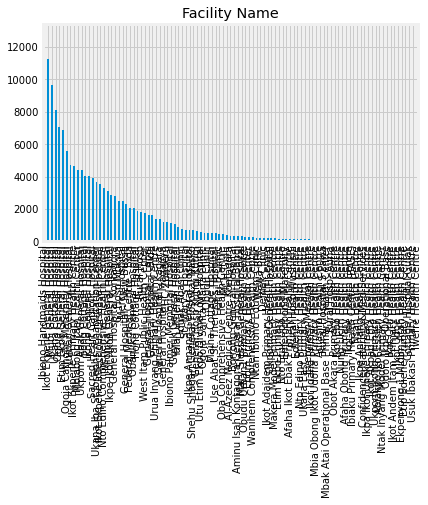

/anaconda/envs/py38_default/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)


In [ ]:
categorical_bar_plot(df_dem_data)

#### Patients Registered/Started Validation

In [ ]:
df_dem = df_dem_data.copy()
df_dem['DATE_REGISTRATION'] = pd.to_datetime(df_dem['DATE_REGISTRATION'],errors='coerce')
df_dem['DATE_STARTED'] = pd.to_datetime(df_dem['DATE_STARTED'],errors='coerce')
df_dem['DATE_REGISTRATION'].head(3)

In [22]:
df_dem['year'] = df_dem['DATE_REGISTRATION'].dt.year
df_dem['year_start'] = df_dem['DATE_STARTED'].dt.year

In [27]:
df_slice_reg = df_dem.query("year > 1997 and year_start < 2025")
df_reg = df_slice_reg.groupby('year').agg({'PATIENT_ID':lambda x: x.nunique()})

In [29]:
df_reg.reset_index(inplace=True)
df_reg['year'] = df_reg['year'].astype('int')

In [30]:
ax_reg = sns.barplot(x = 'year',y='PATIENT_ID',data=df_reg)
ax_reg.set(xlabel='Year Registered', ylabel='Number of Patients')
plt.xticks(rotation=60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '1998'),
  Text(1, 0, '1999'),
  Text(2, 0, '2000'),
  Text(3, 0, '2001'),
  Text(4, 0, '2002'),
  Text(5, 0, '2003'),
  Text(6, 0, '2004'),
  Text(7, 0, '2005'),
  Text(8, 0, '2006'),
  Text(9, 0, '2007'),
  Text(10, 0, '2008'),
  Text(11, 0, '2009'),
  Text(12, 0, '2010'),
  Text(13, 0, '2011'),
  Text(14, 0, '2012'),
  Text(15, 0, '2013'),
  Text(16, 0, '2014'),
  Text(17, 0, '2015'),
  Text(18, 0, '2016'),
  Text(19, 0, '2017'),
  Text(20, 0, '2018'),
  Text(21, 0, '2019'),
  Text(22, 0, '2020'),
  Text(23, 0, '2021')])

In [6]:
df_slice = df_dem.query("year_start > 1994 and year_start < 2025")
df_start = df_slice.groupby('year_start').agg({'PATIENT_ID':lambda x: x.nunique()})

In [7]:
df_start.head(40)

PATIENT_ID
year_start            
2000.0              11
2001.0               3
2002.0               7
2003.0              11
2004.0              19
2005.0              75
2006.0             429
2007.0            1299
2008.0            2329
2009.0            3908
2010.0            3807
2011.0            4810
2012.0            5633
2013.0            6481
2014.0            7173
2015.0            9675
2016.0            9584
2017.0           10309
2018.0            8897
2019.0           16985
2020.0           29357
2021.0            8520

In [8]:
df_start.reset_index(inplace=True)
#sns.barplot(x = 'year_start',y='PATIENT_ID',data=df_start)

In [10]:
df_start['year_start'] = df_start['year_start'].astype('int')

In [17]:
ax_start = sns.barplot(x = 'year_start',y='PATIENT_ID',data=df_start)
ax_start.set(xlabel='Year Started', ylabel='Number of Patients')
plt.xticks(rotation=60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, '2000'),
  Text(1, 0, '2001'),
  Text(2, 0, '2002'),
  Text(3, 0, '2003'),
  Text(4, 0, '2004'),
  Text(5, 0, '2005'),
  Text(6, 0, '2006'),
  Text(7, 0, '2007'),
  Text(8, 0, '2008'),
  Text(9, 0, '2009'),
  Text(10, 0, '2010'),
  Text(11, 0, '2011'),
  Text(12, 0, '2012'),
  Text(13, 0, '2013'),
  Text(14, 0, '2014'),
  Text(15, 0, '2015'),
  Text(16, 0, '2016'),
  Text(17, 0, '2017'),
  Text(18, 0, '2018'),
  Text(19, 0, '2019'),
  Text(20, 0, '2020'),
  Text(21, 0, '2021')])

#### Gender Distribution Check

In [33]:
df_pie = df_dem_data.groupby("GENDER")["PATIENT_ID"].count()

In [34]:
df_pie

GENDER
Female    101537
Male       51015
Name: PATIENT_ID, dtype: int64

Text(0.5, 1.0, 'Number of Patients: By Gender')

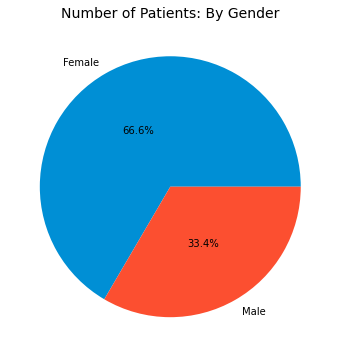

In [37]:
pie, ax = plt.subplots(figsize=[10,6])
labels = df_pie.keys()
plt.pie(x=df_pie, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Number of Patients: By Gender", fontsize=14)

#### Age Distribution Check

In [44]:
df_AGE =  df_dem_data.query("AGE < 100")
ax_age = sns.histplot(data=df_AGE, x="AGE", binwidth=10)
ax_age.set(xlabel='Age', ylabel='Number of Patients')
ax_age.set_title("Age Distribution")

Text(0.5, 1.0, 'Age Distribution')

In [48]:
df_AGE['age_bins'] = pd.cut(x=df_AGE['AGE'], bins=[0,9,19,29,39,49,59,69,79,89,99])

<ipython-input-48-11a994e0c310>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AGE['age_bins'] = pd.cut(x=df_AGE['AGE'], bins=[0,9,19,29,39,49,59,69,79,89,99])


In [51]:
df_AGE.groupby("age_bins")["PATIENT_ID"].count()

age_bins
(0, 9]       5796
(9, 19]      6358
(19, 29]    43570
(29, 39]    53052
(39, 49]    28003
(49, 59]    11443
(59, 69]     3455
(69, 79]      731
(79, 89]      100
(89, 99]       22
Name: PATIENT_ID, dtype: int64

In [52]:
df_check = df_AGE.groupby("age_bins")["PATIENT_ID"].count()

In [56]:
df_check.head(10)

age_bins
(0, 9]       5796
(9, 19]      6358
(19, 29]    43570
(29, 39]    53052
(39, 49]    28003
(49, 59]    11443
(59, 69]     3455
(69, 79]      731
(79, 89]      100
(89, 99]       22
Name: PATIENT_ID, dtype: int64

In [82]:
df_new = df_dem_clean.groupby('year').agg({'PATIENT_ID':lambda x: x.nunique()})

In [83]:
df_new.head(40)

PATIENT_ID
year              
1995.0           1
1997.0           2
1998.0           1
1999.0           1
2000.0          12
2001.0          14
2002.0          20
2003.0          10
2004.0          17
2005.0          37
2006.0         749
2007.0        2183
2008.0        3822
2009.0        6461
2010.0        5757
2011.0        6514
2012.0        7481
2013.0        8887
2014.0       11498
2015.0       13584
2016.0       10491
2017.0       10004
2018.0        9071
2019.0       17321
2020.0       29643
2021.0        8732

In [46]:
df_dem_clean_st = df_dem.query("year_start > 2004 and year_start < 2025")

In [13]:
df_dem_clean.columns

Index(['State', 'L.G.A', 'Facility Name', 'PATIENT_ID', 'FACILITY_ID',
       'HOSPITAL_NUM', 'UNIQUE_ID', 'GENDER', 'DATE_BIRTH', 'AGE', 'age_unit',
       'marital_status', 'education', 'OCCUPATION', 'STATE', 'lga',
       'entry_point', 'DATE_CONFIRMED_HIV', 'DATE_ENROLLED_PMTCT',
       'SOURCE_REFERRAL', 'TIME_HIV_DIAGNOSIS', 'tb_status', 'PREGNANT',
       'BREASTFEEDING', 'DATE_REGISTRATION', 'STATUS_REGISTRATION',
       'ENROLLMENT_SETTING', 'CBO_ID', 'DATE_STARTED', 'enrolled_ovc',
       'RECENCY_CONSENT', 'RECENCY_TESTING', 'CURRENT_STATUS',
       'DATE_CURRENT_STATUS', 'REGIMENTYPE', 'REGIMEN', 'LAST_CLINIC_STAGE',
       'LAST_VIRAL_LOAD', 'LAST_CD4', 'LAST_CD4P', 'DATE_LAST_CD4',
       'DATE_LAST_VIRAL_LOAD', 'VIRAL_LOAD_DUE_DATE', 'VIRAL_LOAD_TYPE',
       'DATE_LAST_REFILL', 'DATE_NEXT_REFILL', 'LAST_REFILL_DURATION',
       'LAST_REFILL_SETTING', 'DATE_LAST_CLINIC', 'DATE_NEXT_CLINIC',
       'DATE_TRACKED', 'OUTCOME', 'CAUSE_DEATH', 'AGREED_DATE', 'BIOMETRIC',
    

In [ ]:
print(f"{len(df_dem.query("year > 2021"))}

In [12]:
df_dem['DATE_REGISTRATION'].max(),df_dem['DATE_REGISTRATION'].min()

(Timestamp('2201-01-18 00:00:00'), Timestamp('1958-11-30 00:00:00'))